# ISEL - CPS 
## Semestre 2020/21
# <br>
###  <center> Trabalho Prático </center>
# </br>

Trabalho realizado por:
* Aurizando Silva, <b> 47461 </b>
* Diana Silva, numero <b> 46308 </b>

data: 28/10/2020

A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

Este trabalho foca os blocos de Quantificação e Desquantificação do sinal.

Considere as funções já criadas em Python das aulas anteriores.

Crie uma função que meça o SNR prático, ou seja, medindo a potência do sinal e a potência do sinal de erro.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.gridspec as gridspec

In [2]:
#funçao auxiliar

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.gridspec as gridspec

def Quantific(R, Vmax, Qtype):
    L = 2.**R 
    delta = (2.*Vmax)/L
    delta_2 = delta/2
    v_max_posi = (L-1)*delta_2
    
    val_quantificacao = np.arange(-v_max_posi, v_max_posi+delta, delta)
    val_decisao = np.arange(-Vmax, Vmax+delta, delta)

    if(Qtype == 0): # midtread
        val_decisao[1:-1] = val_decisao[1:-1]+delta_2
        val_quantificacao = val_quantificacao+delta_2
    Vmin= -Vmax
    IQ = np.arange(Vmin, Vmax+delta/2, delta)
    Q = np.arange(Vmin+delta/2, Vmax, delta)
    return val_quantificacao, val_decisao

In [3]:
#funcao auxiliar 

def valor_perto(array, valor):
    array = np.asarray(array)
    posicao = (np.abs(array - valor)).argmin()
    return posicao


def Quantificador(x, Vq, Iq):
    
    xq = []
    
    for valor in range(len(x)):
        posicao = valor_perto(Vq, x[valor])
        
        xq.append(Vq[posicao])
                        
    return xq

In [4]:
def Measure_SNRp(x,y):
    #print(x)
    
    ruido = []  
    for i in range(len(x)):
        aux = x[i] - y[i]
        ru = aux - aux/2
        ruido.append(ru) 
    Psinal = y[len(y)-1]**2/3
    Pruido = ruido[len(ruido)-1]**2/3
    SNRp = 10 * np.log10(Psinal/Pruido)  
    # resposta
    return SNRp

In [5]:
#def SNRPratica(signal, signalQ):
#    error = signal - signalQ
#    return 10. * np.log10(sum(signal**2.) / sum(error**2.))

In [6]:
x = [0.1, 0.6, -0.8]

Vqx, Iqx = Quantific(3,1,'midrise')
y = Quantificador(x, Vqx,Iqx)

print(Measure_SNRp(x, y))

27.35953570589189


Crie uma função que calcule o SNR para o caso da quantificação uniforme.

In [7]:
def Measure_SNRt(R,Vmax,P):
    
    #potência do sinal
    #P = sum(signal**2.)/len(signal)    
    SNRt = 6.02 * R + 10 * (np.log10((3*P)/(Vmax**2)))
    #resposta
    return SNRt

R = 3
Vmax = 1
P = 0.5

print(Measure_SNRt(R, Vmax, P))

19.820912590556812


Considere o sinal de rampa $x(t)= 1000t\Pi\left(\frac{t-0.5\times10^{-3}}{10^{-3}}\right)$, no intervalo $0<t<1\,ms$, já implementado na aula anterior.
Realize a quantificação do sinal x(t) para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico. 
Construa um gráfico com ambos os valores da SNR teórica e medida em função do número de bits R. Comente os resultados.

In [31]:
#Resposta:

#Frequência
Fs = 48000
#Período
Ts = 1/Fs
# x entre 0 e 1
#começa no 0, acaba no 1, Ts = espaçamento entre valores
t = np.arange(0,0.001,Ts)

#construcao x(t)
x = 1000*t*np.pi*((t-0.5*10**-3)/10**-3)

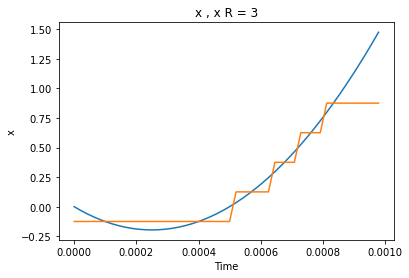

In [9]:
#quantificacao do sinal x(t) R = 3

Vq3, Iq3 = Quantific(3,1,'midrise')
x3 = Quantificador(x, Vq3, Iq3)

Measure_SNRp(x, x3)

R = 3
Vmax = Vq3[len(Vq3)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

plt.plot(t,x)
plt.ylabel("x")
plt.xlabel("Time")
plt.title("x , x R = 3")
Vq, Iq = Quantific(R,Vmax,'midrise')
plt.plot(t,x3)
plt.show()

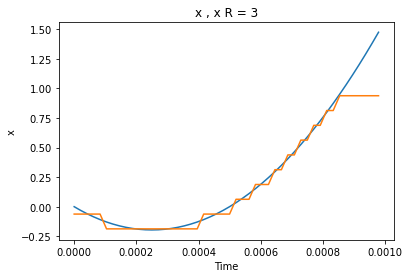

In [10]:
#quantificacao do sinal x(t) R = 4

Vq4, Iq4 = Quantific(4,1,'midrise')
x4 = Quantificador(x, Vq4, Iq4)

Measure_SNRp(x, x4)

R = 4
Vmax = Vq4[len(Vq4)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

plt.plot(t,x)
plt.ylabel("x")
plt.xlabel("Time")
plt.title("x , x R = 3")
Vq, Iq = Quantific(R,Vmax,'midrise')
plt.plot(t,x4)
plt.show()

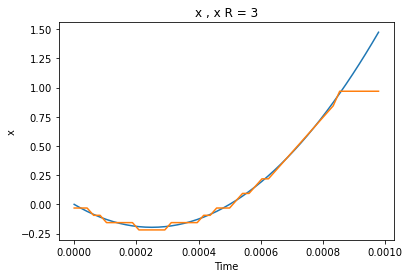

In [11]:
#quantificacao do sinal x(t) R = 5

Vq5, Iq5 = Quantific(5,1,'midrise')
x5 = Quantificador(x, Vq5, Iq5)

Measure_SNRp(x, x5)

R = 5
Vmax = Vq5[len(Vq5)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

plt.plot(t,x)
plt.ylabel("x")
plt.xlabel("Time")
plt.title("x , x R = 3")
Vq, Iq = Quantific(R,Vmax,'midrise')
plt.plot(t,x5)
plt.show()

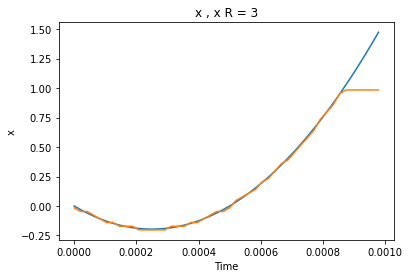

In [12]:
#quantificacao do sinal x(t) R = 6

Vq6, Iq6 = Quantific(6,1,'midrise')
x6 = Quantificador(x, Vq6, Iq6)

Measure_SNRp(x, x6)

R = 6
Vmax = Vq6[len(Vq6)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

plt.plot(t,x)
plt.ylabel("x")
plt.xlabel("Time")
plt.title("x , x R = 3")
Vq, Iq = Quantific(R,Vmax,'midrise')
plt.plot(t,x6)
plt.show()

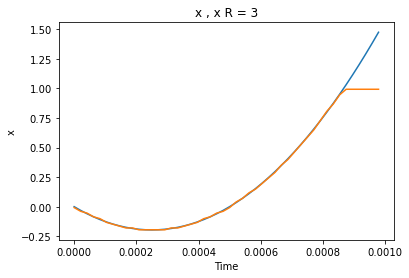

In [13]:
#quantificacao do sinal x(t) R = 7

Vq7, Iq7 = Quantific(7,1,'midrise')
x7 = Quantificador(x, Vq7, Iq7)

Measure_SNRp(x, x7)

R = 7
Vmax = Vq7[len(Vq7)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

plt.plot(t,x)
plt.ylabel("x")
plt.xlabel("Time")
plt.title("x , x R = 3")
Vq, Iq = Quantific(R,Vmax,'midrise')
plt.plot(t,x7)
plt.show()

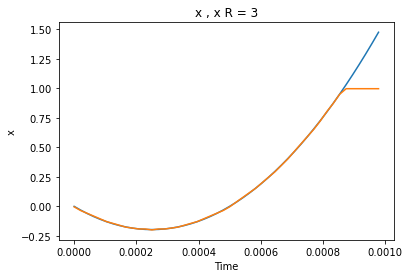

In [14]:
#quantificacao do sinal x(t) R = 8

Vq8, Iq8 = Quantific(8,1,'midrise')
x8 = Quantificador(x, Vq8, Iq8)

Measure_SNRp(x, x8)

R = 8
Vmax = Vq8[len(Vq8)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

plt.plot(t,x)
plt.ylabel("x")
plt.xlabel("Time")
plt.title("x , x R = 3")
Vq, Iq = Quantific(R,Vmax,'midrise')
plt.plot(t,x8)
plt.show()

Resposta

Quanto maior o numero de bits usados na quantificacao, melhor fica o resultado da quantificacao, i.e, 
mais aproximado fica o sinal quantificado do seu original

Grave um sinal de voz através do microfone com aproximadamente um segundo de duração. 
Faça a leitura do ficheiro de aúdio previamente gravado para um Numpy array.
Apresente o sinal em função do tempo.

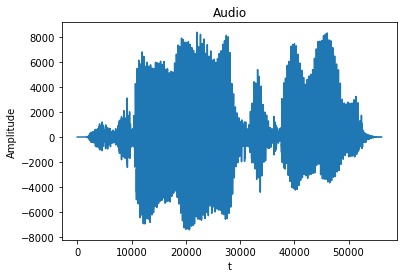

In [15]:
import scipy.io.wavfile as wav
from scipy.io.wavfile import read
from IPython.display import display, Audio

fs,data=wav.read('sanae.wav')
voz = data[:,0]
display(Audio(data=voz, rate=fs))

ficheiro_audio2 = np.array(voz, dtype = int)

plt.plot(voz)
plt.title("Audio")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

Realize a quantificação do sinal de voz para cada valor de R={3,4,5,6,7,8}.
Meça a SNR prática e o valor teórico (para determinar a potência no caso teórico deve usar o mesmo valor que na prática). 
Construa um gráfico com ambos os valores da SNR teórica e SNR medida em função do número de bits R.
Comente os resultados.

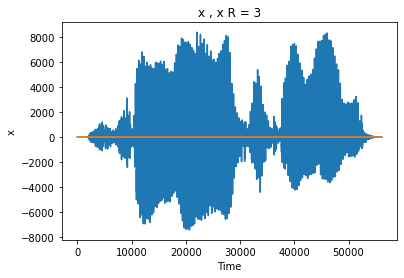

In [16]:
#quantificacao do ficheiro audio R = 3

Vz3, Iz3 = Quantific(3,1,'midrise')
voz3 = Quantificador(voz, Vz3, Iz3)

Measure_SNRp(voz, voz3)

R = 3
Vmax = Vz3[len(Vz3)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

plt.plot(voz)
plt.ylabel("x")
plt.xlabel("Time")
plt.title("x , x R = 3")
Vq, Iq = Quantific(R,Vmax,'midrise')
plt.plot(voz3)
plt.show()

In [17]:
#quantificacao do ficheiro audio R = 4

Vz4, Iz4 = Quantific(4,1,'midrise')
voz4 = Quantificador(voz, Vz4, Iz4)

Measure_SNRp(voz, voz4)

R = 4
Vmax = Vz4[len(Vz4)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

25.840912590556812

In [18]:
#quantificacao do ficheiro audio R = 5

Vz5, Iz5 = Quantific(5,1,'midrise')
voz5 = Quantificador(voz, Vz5, Iz5)

Measure_SNRp(voz, voz5)

R = 5
Vmax = Vz5[len(Vz5)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

31.86091259055681

In [19]:
#quantificacao do ficheiro audio R = 6

Vz6, Iz6 = Quantific(6,1,'midrise')
voz6 = Quantificador(voz, Vz6, Iz6)

Measure_SNRp(voz, voz6)

R = 6
Vmax = Vz6[len(Vz6)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

37.88091259055681

In [20]:
#quantificacao do ficheiro audio R = 7

Vz7, Iz7 = Quantific(7,1,'midrise')
voz7 = Quantificador(voz, Vz7, Iz7)

Measure_SNRp(voz, voz7)

R = 7
Vmax = Vz7[len(Vz7)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

43.900912590556814

In [21]:
#quantificacao do ficheiro audio R = 8

Vz8, Iz8 = Quantific(8,1,'midrise')
voz8 = Quantificador(voz, Vz8, Iz8)

Measure_SNRp(voz, voz8)

R = 8
Vmax = Vz8[len(Vz8)-1]
P = Vmax**2 / 2

Measure_SNRt(R, Vmax, P)

49.92091259055681

<function matplotlib.pyplot.show(*args, **kw)>

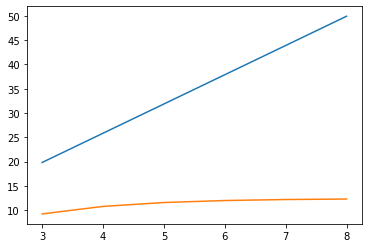

In [22]:
Rbits = [3,4,5,6,7,8]

def graficoSNRt(Rbits, P, Vmax):
    SNRt = []
    
    for i in range(len(Rbits)):
        aux = Measure_SNRt(Rbits[i],Vmax,P)
        SNRt.append(aux)
    
    return SNRt
        

def graficoSNRp(Rbits, P, Vmax):
    SNRp = []
    
    for i in range(len(Rbits)):
        Vq, Iq = Quantific(Rbits[i],Vmax,'midrise')
        y = Quantificador(x, Vq,Iq) 
        aux = Measure_SNRp(x, y)
        SNRp.append(aux)

    
    return SNRp
        

plt.plot(Rbits, graficoSNRt(Rbits, P, Vmax))

plt.plot(Rbits, graficoSNRp(Rbits, P, Vmax))

plt.show

Resposta

Os valores da pratica e da teorica sao bastante discrepantes, quando se esperava uma sobreposicao dos mesmos

Faça a leitura do ficheiro de imagem. Teste o código a baixo com vários valores de Q. Descreva o que produz o
código.

In [23]:
from PIL import Image
Q = 90
im = Image.open("lena_gray.png")
im = im.quantize(Q)
im.show()

resposta

Após a leitura do ficheiro de imagem e da alteração do parâmetro Q como sugerido pelo enunciado o output do codigo produz a criação de uma janela onde nos é apresentada a imagem quantizada tendo como argumento o valor de Q é possivel verificar que a cada aumento do valor de Q a qualidade da imagem fica melhor,i.e, a imagem é melhor percitível, ao passo que a redução do valor Q tem o efeito contrario.
A função quantize aparenta definir o numero de cores usadas para a representar a imagem, dai a qualidade da imagem aumentar com o aumento do valor de Q.

Considere as funções já ciradas e aplique-as à imagem de forma a realizar a quantificação da mesma. Considere diferentes valores de R.

In [24]:
def valor_perto(array, valor):
    array = np.asarray(array)
    posicao = (np.abs(array - valor)).argmin()
    return posicao


def Quantificador(x, Vq, Iq):
    
    xq = []
    
    for y in range(len(x)):
        array = []
        for z in range(len(x[y])):
            posicao = valor_perto(Vq, x[y][z])
            array.append(posicao) 
        
        xq.append(array)       
        
    array = np.array(xq)
                        
    return array

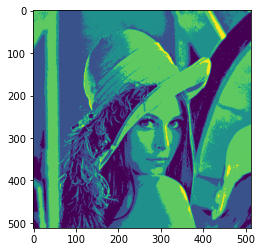

In [25]:
#resposta

data = np.asarray(im)

#R = 3

#Quantificaçao
Vq_im, Iq_im = Quantific(3,100,'midrise')
y = Quantificador(data, Vq_im, Iq_im)

#print(y)

#PIL nao suporta a representacao de imagens por floats
#para imagens RGB
# por faz se a conversao da imagem para o formato esperado pelo PIL uint8
im2 = Image.fromarray((y * 255).astype(np.uint8))

plt.imshow(im2)
plt.show()

#im2.show()

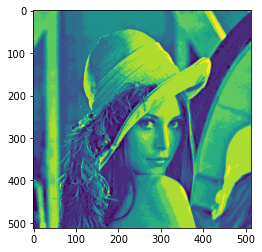

In [26]:
#resposta

data = np.asarray(im)

#R = 4

#Quantificaçao
Vq_im, Iq_im = Quantific(4,100,'midrise')
y = Quantificador(data, Vq_im, Iq_im)

#print(y)

im2 = Image.fromarray((y * 255).astype(np.uint8))

plt.imshow(im2)
plt.show()

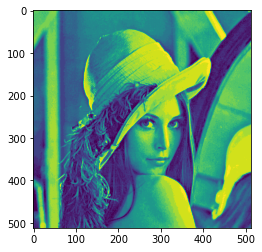

In [27]:
#resposta

data = np.asarray(im)

#R = 5

#Quantificaçao
Vq_im, Iq_im = Quantific(5,100,'midrise')
y = Quantificador(data, Vq_im, Iq_im)

im2 = Image.fromarray((y * 255).astype(np.uint8))

plt.imshow(im2)
plt.show()

#im2.show()

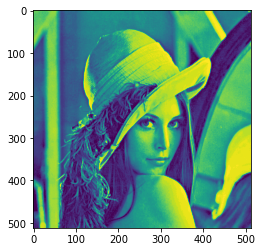

In [28]:
#resposta

data = np.asarray(im)

#R = 6

#Quantificaçao
Vq_im, Iq_im = Quantific(6,100,'midrise')
y = Quantificador(data, Vq_im, Iq_im)

im2 = Image.fromarray((y * 255).astype(np.uint8))

plt.imshow(im2)
plt.show()

#im2.show()

In [29]:
#resposta

data = np.asarray(im)

#R = 7

#Quantificaçao
Vq_im, Iq_im = Quantific(7,100,'midrise')
y = Quantificador(data, Vq_im, Iq_im)

im2 = Image.fromarray((y * 255).astype(np.uint8))

#im3 = im.quantize(255)
#plt.imshow(im2)
im2.show()

#im2.show()

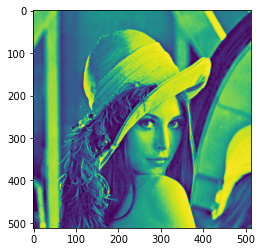

In [30]:
#resposta

data = np.asarray(im)

#R = 8

#Quantificaçao
Vq_im, Iq_im = Quantific(8,100,'midrise')
y = Quantificador(data, Vq_im, Iq_im)

im2 = Image.fromarray((y * 255).astype(np.uint8))

plt.imshow(im2)
plt.show()

#im2.show()